In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns               #pip install seaborn
sns.set_style('whitegrid')

In [2]:
# room occupancy training data

df = pd.read_csv('/Users/maryhennessy/Nellie/da/datatraining.csv')

Occupancy
0    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
1    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
dtype: object

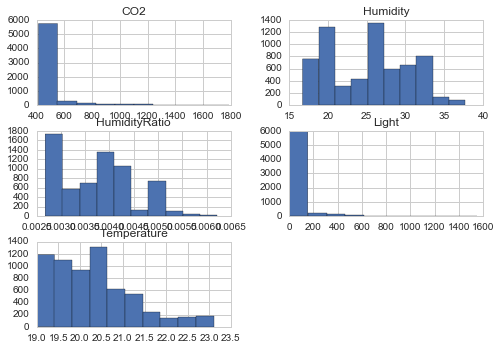

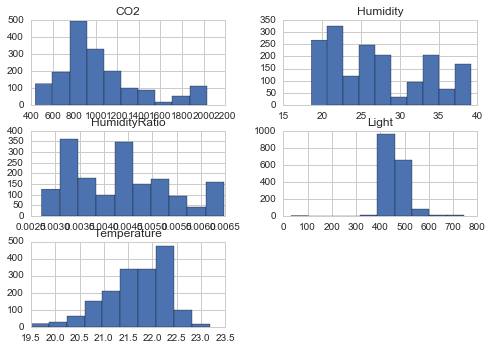

In [3]:
df.groupby('Occupancy').hist()

Occupancy
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Light, dtype: object

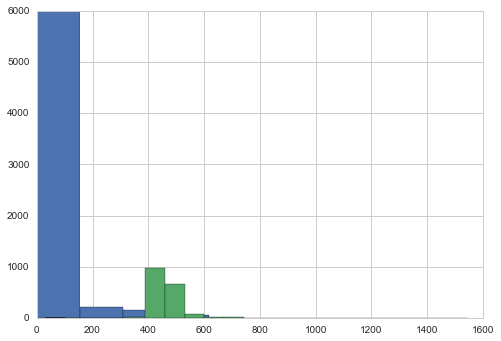

In [4]:
df.groupby('Occupancy').Light.hist(alpha=0.4)

In [5]:
df.head(5)

,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,04/02/2015 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,04/02/2015 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,04/02/2015 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,04/02/2015 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,04/02/2015 17:55,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
df.describe()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [7]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [8]:
df.Temperature.value_counts()



19.390000    532
20.290000    416
19.500000    357
20.500000    328
19.290000    270
20.390000    262
20.200000    245
20.890000    222
22.100000    219
20.000000    218
21.200000    211
19.790000    208
19.700000    173
20.700000    169
21.000000    168
19.890000    165
21.700000    155
21.290000    147
20.100000    144
21.500000    143
22.200000    136
19.200000    113
21.390000    112
19.600000    106
21.100000    105
20.600000    101
22.290000     84
22.000000     81
21.790000     78
21.890000     73
            ... 
22.463333      1
21.325000      1
20.958750      1
19.434000      1
22.633333      1
22.865000      1
23.040000      1
20.215000      1
19.972500      1
22.963333      1
21.640000      1
19.856667      1
22.272000      1
19.580000      1
20.381667      1
22.008333      1
19.917500      1
22.840000      1
23.020000      1
19.815000      1
22.016667      1
19.272000      1
23.180000      1
21.754000      1
19.350000      1
19.412000      1
19.175000      1
19.865000     

In [9]:
df.Temperature.count()

8143

In [10]:
df.info() # confirm no nulls here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
Date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


In [11]:
df.dtypes

Date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [12]:
df.tail(5)

,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8138,10/02/2015 09:29,21.05,36.0975,433.0,787.250000,0.005579,1
8139,10/02/2015 09:29,21.05,35.9950,433.0,789.500000,0.005563,1
8140,10/02/2015 09:30,21.10,36.0950,433.0,798.500000,0.005596,1
8141,10/02/2015 09:32,21.10,36.2600,433.0,820.333333,0.005621,1
8142,10/02/2015 09:33,21.10,36.2000,447.0,821.000000,0.005612,1


In [13]:
df[99:103]

,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
99,04/02/2015 19:30,22.1,27.2,0.0,568.000000,0.004475,0
100,04/02/2015 19:31,22.1,27.2,0.0,574.500000,0.004475,0
101,04/02/2015 19:32,22.1,27.2,0.0,564.333333,0.004475,0
102,04/02/2015 19:33,22.1,27.2,0.0,563.000000,0.004475,0


In [14]:
df['Date'].head(5)

0    04/02/2015 17:51
1    04/02/2015 17:51
2    04/02/2015 17:53
3    04/02/2015 17:54
4    04/02/2015 17:55
Name: Date, dtype: object

In [15]:
df['Date'].tail(3)

8140    10/02/2015 09:30
8141    10/02/2015 09:32
8142    10/02/2015 09:33
Name: Date, dtype: object

In [16]:
print (df[(df.Occupancy == 0)&(df.Temperature > 23)&(df.Humidity > 17)]) #AND

                  Date  Temperature   Humidity       Light         CO2  \
3996  07/02/2015 12:27    23.033333  17.426667  318.333333  457.000000   
3997  07/02/2015 12:28    23.033333  17.356667  312.333333  455.000000   
3999  07/02/2015 12:29    23.020000  17.352000  317.500000  456.000000   
4000  07/02/2015 12:30    23.033333  17.356667  308.500000  454.000000   
4001  07/02/2015 12:32    23.025000  17.365000  306.750000  447.250000   
4002  07/02/2015 12:33    23.040000  17.350000  321.250000  445.500000   
4003  07/02/2015 12:34    23.066667  17.356667  305.000000  450.250000   
4004  07/02/2015 12:35    23.050000  17.315000  315.000000  446.750000   
4005  07/02/2015 12:36    23.100000  17.290000  310.500000  446.500000   
4006  07/02/2015 12:36    23.066667  17.260000  297.000000  448.666667   
4007  07/02/2015 12:38    23.066667  17.260000  297.000000  451.333333   
4008  07/02/2015 12:39    23.100000  17.290000  310.500000  453.500000   
4009  07/02/2015 12:40    23.075000  1

In [17]:
print (df.iloc[99]) #row by position

Date             04/02/2015 19:30
Temperature                  22.1
Humidity                     27.2
Light                           0
CO2                           568
HumidityRatio            0.004475
Occupancy                       0
Name: 99, dtype: object


In [18]:
print (df.iloc[[99,1099,2099,3099]])

                  Date  Temperature  Humidity       Light          CO2  \
99    04/02/2015 19:30        22.10      27.2    0.000000   568.000000   
1099  05/02/2015 12:10        22.20      27.0  502.333333  1083.666667   
2099  06/02/2015 04:50        20.39      18.7    0.000000   425.500000   
3099  06/02/2015 21:29        20.20      19.0    0.000000   446.000000   

      HumidityRatio  Occupancy  
99         0.004475          0  
1099       0.004469          1  
2099       0.002762          0  
3099       0.002774          0  


In [19]:
print (df.loc[99]) #row by label

Date             04/02/2015 19:30
Temperature                  22.1
Humidity                     27.2
Light                           0
CO2                           568
HumidityRatio            0.004475
Occupancy                       0
Name: 99, dtype: object


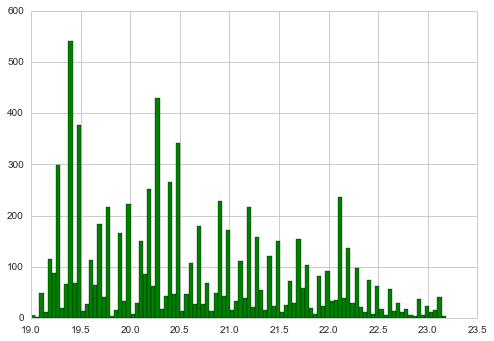

In [20]:
df['Temperature'].hist(bins=100, color='green')

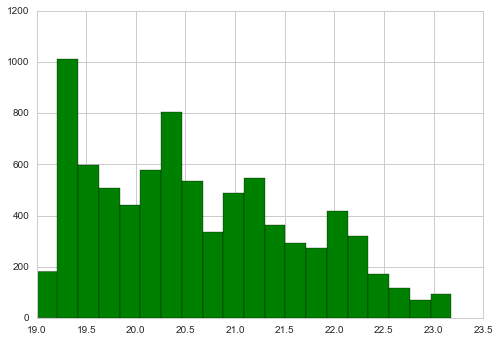

In [21]:
df['Temperature'].hist(bins=20, color='green')

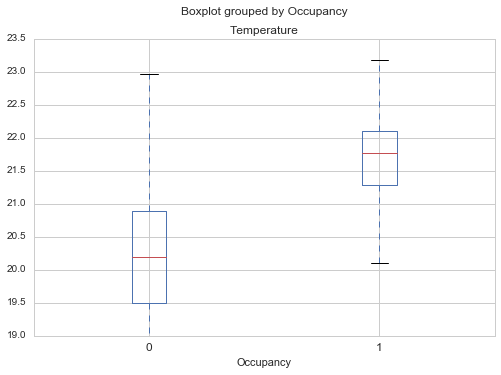

In [22]:
df.boxplot(column= 'Temperature', by = 'Occupancy') #temp interesting

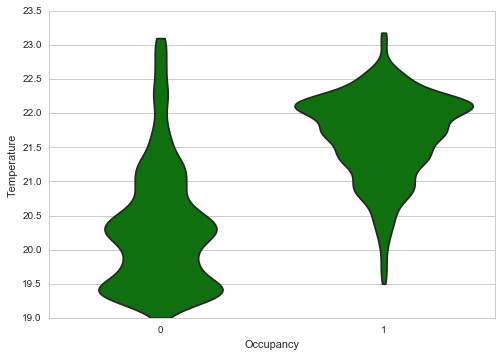

In [23]:
sns.violinplot(data = df, x='Occupancy', y='Temperature', inner=None, color="green", cut=0) #look inside

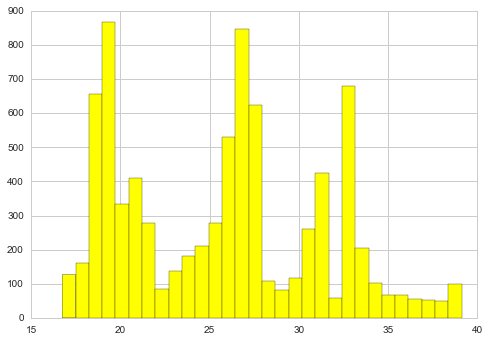

In [24]:
df['Humidity'].hist(bins=30, color='yellow')

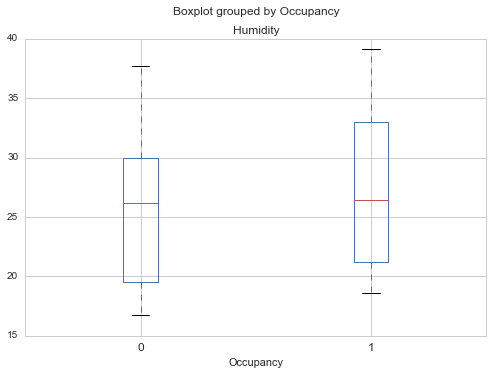

In [25]:
df.boxplot(column= 'Humidity', by = 'Occupancy') # investigate more

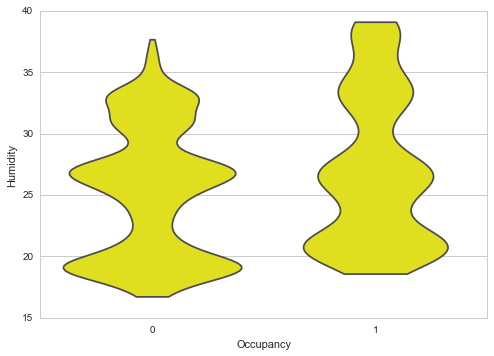

In [26]:
sns.violinplot(data = df, x='Occupancy', y='Humidity', inner=None, color="yellow", cut=0) #better but humidity might be left out for testing

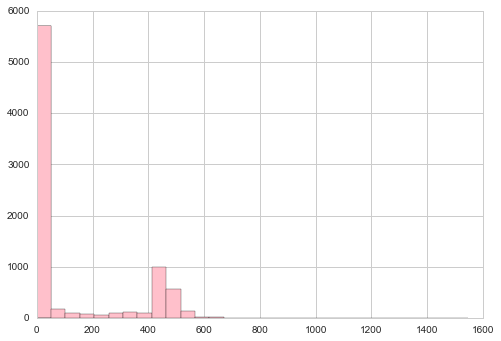

In [27]:
df['Light'].hist(bins=30, color='pink')

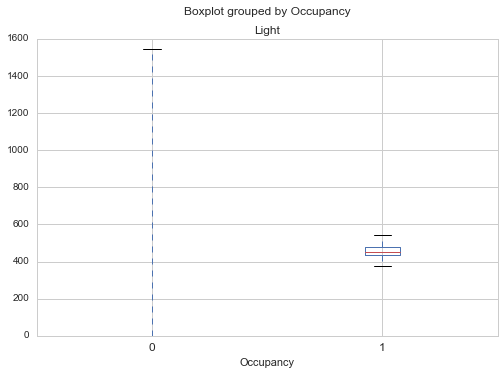

In [28]:
df.boxplot(column= 'Light', by = 'Occupancy')

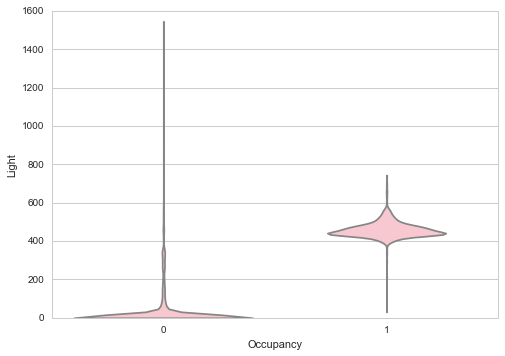

In [29]:
sns.violinplot(data = df, x='Occupancy', y='Light', inner=None, color="pink", cut=0) # a lot more information here 

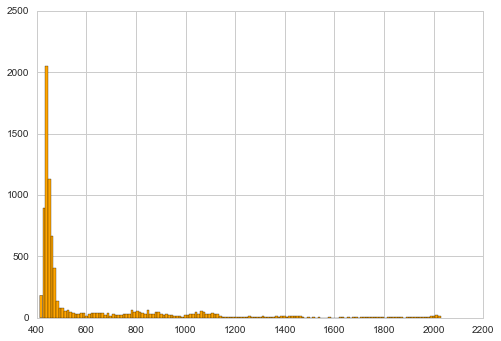

In [30]:
df['CO2'].hist(bins=150, color='orange')

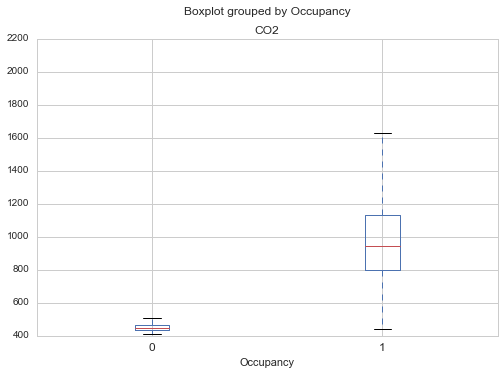

In [31]:
df.boxplot(column= 'CO2', by = 'Occupancy')

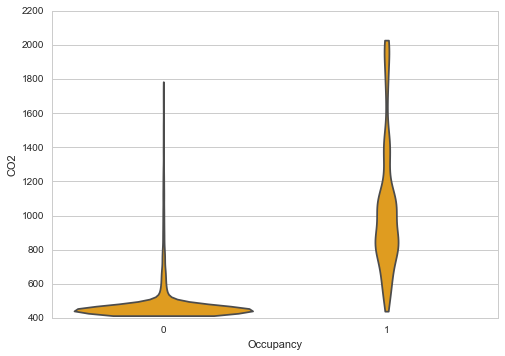

In [32]:
sns.violinplot(data = df, x='Occupancy', y='CO2', inner=None, color="orange", cut=0) 

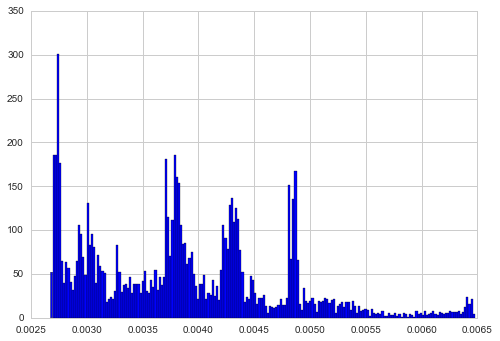

In [33]:
df['HumidityRatio'].hist(bins=200, color='blue')

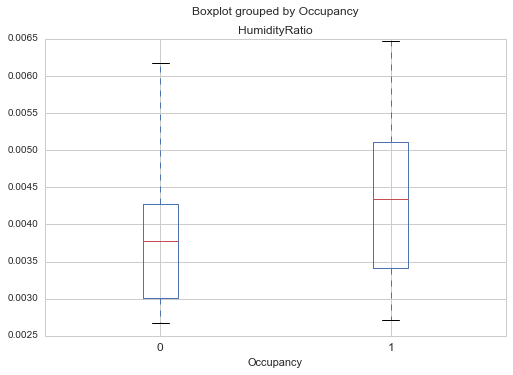

In [34]:
df.boxplot(column= 'HumidityRatio', by = 'Occupancy')

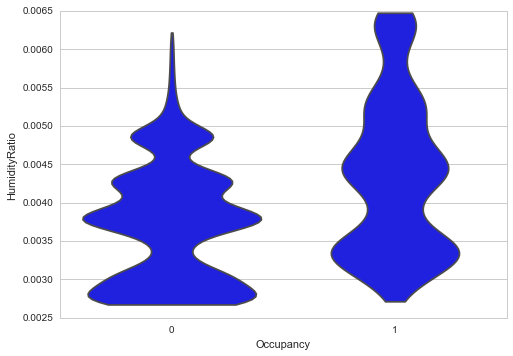

In [35]:
sns.violinplot(data = df, x='Occupancy', y='HumidityRatio', inner=None, color="blue", cut=0)# more alike here

In [36]:
# what to scatter plot...

#df = pd.DataFrame(np.random.rand(10000, 5), columns=['Occupancy','Temperature', 'Light', 'CO2', 'Humidity', 'HumidityRatio'])

#ax = df.plot.scatter(x='Light', y='Occupancy',s=df['CO2']*100, label='Occupancy/CO2');


#df.plot.scatter(x='Light', y='HumidityRatio', color='Green', label='Light/HumidityRatio', ax=ax);

In [37]:
#full_or_empty = (df.groupby('Occupancy'))

#print full_or_empty.sum()
 

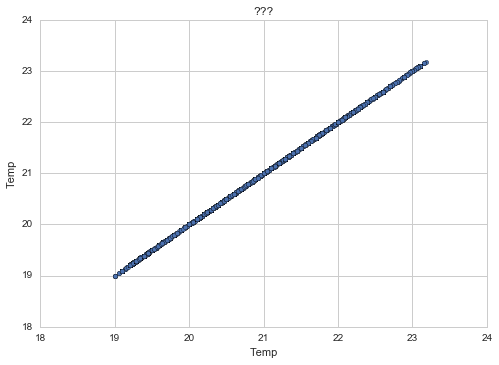

In [38]:
scatterpl = df.plot.scatter(x='Temperature',y='Temperature')
scatterpl.set(title='???',xlabel='Temp',ylabel='Temp')

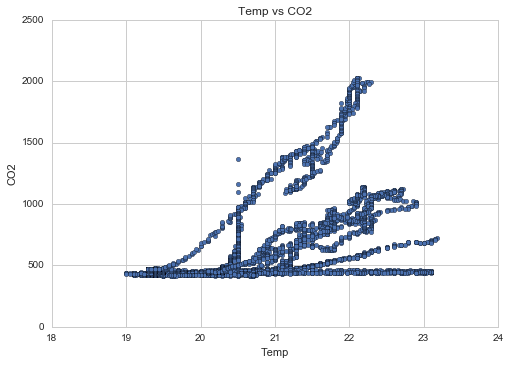

In [39]:
scatterpl = df.plot.scatter(x='Temperature',y='CO2')
scatterpl.set(title='Temp vs CO2', xlabel='Temp', ylabel='CO2')

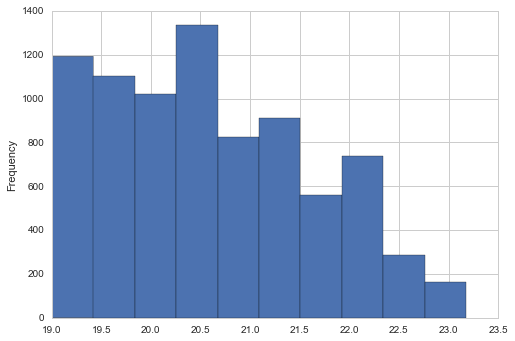

In [51]:

#binning Temperature for graph
bins=[0,18,19,20,21,22,23,100]
#heat_groups = ['18s','19s','20s','21s','22s','23s','24plus']
heat_groups = ['18s','19s','20s','21s','22s','23s','24plus']
#heat_groups = df.groupby('Temperature').size().sort_values()
#df4 = pd.cut(df.Temperature, range(0,9,1),labels = heat_groups)
#df['Temperature'].bar#(bins=8, color='green')

TemperatureRanges = pd.cut(df.Temperature,bins,labels = heat_groups)
df['TemperatureRanges'] = pd.cut(df.Temperature,bins ,labels = heat_groups)
pd.value_counts(df['TemperatureRanges'])
df.Temperature.plot.hist()

In [ ]:
heat_groups

In [ ]:
heat_groups

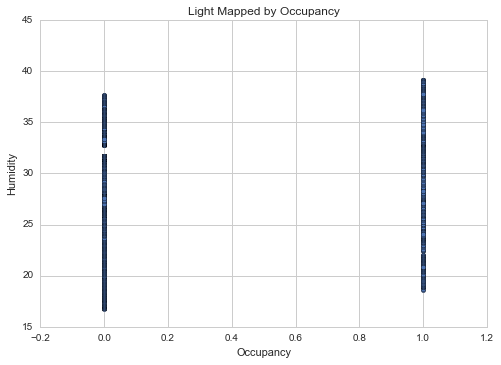

In [52]:
scatterpl = df.plot.scatter(x='Occupancy',y='Humidity')
scatterpl.set(title='Light Mapped by Occupancy', xlabel='Occupancy', ylabel='Humidity')

In [53]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8133,8134,8135,8136,8137,8138,8139,8140,8141,8142
Date,04/02/2015 17:51,04/02/2015 17:51,04/02/2015 17:53,04/02/2015 17:54,04/02/2015 17:55,04/02/2015 17:55,04/02/2015 17:57,04/02/2015 17:57,04/02/2015 17:58,04/02/2015 18:00,...,10/02/2015 09:23,10/02/2015 09:24,10/02/2015 09:26,10/02/2015 09:27,10/02/2015 09:28,10/02/2015 09:29,10/02/2015 09:29,10/02/2015 09:30,10/02/2015 09:32,10/02/2015 09:33
Temperature,23.18,23.15,23.15,23.15,23.1,23.1,23.1,23.1,23.1,23.075,...,21,21,21.025,21,21.05,21.05,21.05,21.1,21.1,21.1
Humidity,27.272,27.2675,27.245,27.2,27.2,27.2,27.2,27.2,27.2,27.175,...,35.85,35.7,35.95,35.86,36.05,36.0975,35.995,36.095,36.26,36.2
Light,426,429.5,426,426,426,419,419,419,419,419,...,433,433,433,433,433,433,433,433,433,447
CO2,721.25,714,713.5,708.25,704.5,701,701.667,699,689.333,688,...,756.25,761,763,771.333,780.25,787.25,789.5,798.5,820.333,821
HumidityRatio,0.004793,0.004783,0.004779,0.004772,0.004757,0.004757,0.004757,0.004757,0.004757,0.004745,...,0.005523,0.0055,0.005547,0.005525,0.005571,0.005579,0.005563,0.005596,0.005621,0.005612
Occupancy,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
TemperatureRanges,24plus,24plus,24plus,24plus,24plus,24plus,24plus,24plus,24plus,24plus,...,21s,21s,22s,21s,22s,22s,22s,22s,22s,22s


In [44]:
df2 = df.set_index(['Date'])

In [45]:
df2.head(10)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Date,,,,,,
04/02/2015 17:51,23.180,27.2720,426.0,721.250000,0.004793,1
04/02/2015 17:51,23.150,27.2675,429.5,714.000000,0.004783,1
04/02/2015 17:53,23.150,27.2450,426.0,713.500000,0.004779,1
04/02/2015 17:54,23.150,27.2000,426.0,708.250000,0.004772,1
04/02/2015 17:55,23.100,27.2000,426.0,704.500000,0.004757,1
04/02/2015 17:55,23.100,27.2000,419.0,701.000000,0.004757,1
04/02/2015 17:57,23.100,27.2000,419.0,701.666667,0.004757,1
04/02/2015 17:57,23.100,27.2000,419.0,699.000000,0.004757,1
04/02/2015 17:58,23.100,27.2000,419.0,689.333333,0.004757,1


In [46]:

df3 = df.set_index(['Occupancy'])

In [47]:
df3

,Date,Temperature,Humidity,Light,CO2,HumidityRatio
Occupancy,,,,,,
1,04/02/2015 17:51,23.180000,27.272000,426.0,721.250000,0.004793
1,04/02/2015 17:51,23.150000,27.267500,429.5,714.000000,0.004783
1,04/02/2015 17:53,23.150000,27.245000,426.0,713.500000,0.004779
1,04/02/2015 17:54,23.150000,27.200000,426.0,708.250000,0.004772
1,04/02/2015 17:55,23.100000,27.200000,426.0,704.500000,0.004757
1,04/02/2015 17:55,23.100000,27.200000,419.0,701.000000,0.004757
1,04/02/2015 17:57,23.100000,27.200000,419.0,701.666667,0.004757
1,04/02/2015 17:57,23.100000,27.200000,419.0,699.000000,0.004757
1,04/02/2015 17:58,23.100000,27.200000,419.0,689.333333,0.004757
